This code contain some source codes and models for some simple data of Nuclear Laboratory Cource in University of Tehran.
There are several experiments and most of them are related to geiger muller counter.

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from scipy.stats import poisson
from scipy.interpolate import make_interp_spline
from math import sqrt
from scipy.stats import linregress
from scipy import stats
from scipy.optimize import curve_fit
from pylab import *
import pandas as pd
from IPython.display import clear_output

In [2]:
mydict2 = {
    10: 5, 20: 3, 30: 4, 40: 1, 50: 3, 60: 3, 70: 4, 80: 3, 90: 3, 100: 3,
    110: 1, 120: 1, 130: 4, 140: 2, 150: 2, 160: 4, 170: 1, 180: 3, 190: 3,
    200: 3, 210: 5, 220: 2, 230: 3, 240: 3, 250: 3, 260: 1, 270: 1, 280: 5,
    290: 2, 300: 6, 310: 2, 320: 2, 330: 3, 340: 2, 350: 1, 360: 3, 370: 1,
    380: 3, 390: 3, 400: 0, 410: 2, 420: 1, 430: 1, 440: 3, 450: 1, 460: 4,
    470: 1, 480: 3, 490: 0, 500: 1, 510: 2, 520: 3, 530: 2, 540: 1, 550: 5,
    560: 1, 570: 2, 580: 3, 590: 2, 600: 3}

mydict = {}
for i in range(0,7):
    v = list(mydict2.values()).count(i)
    mydict[i] = v
print(mydict)

{0: 2, 1: 15, 2: 12, 3: 21, 4: 5, 5: 4, 6: 1}


0.10502925575153821


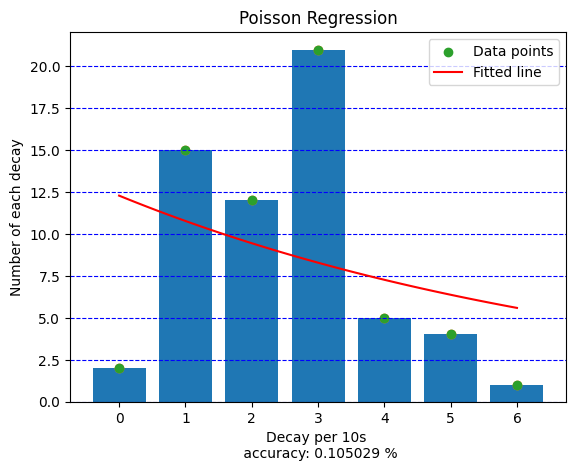

In [3]:
data_dict = {0: 2, 1: 15, 2: 12, 3: 21, 4: 5, 5: 4, 6: 1}
plt.bar(mydict.keys(),height=mydict.values())
plt.scatter(mydict.keys(),mydict.values())

X = list(data_dict.keys())
y = list(data_dict.values())

X = np.array(X).reshape(-1, 1)

clf = PoissonRegressor()
clf.fit(X, y)
print(clf.score(X,y))

X_plot = np.linspace(min(X), max(X), 100).reshape(-1, 1)

y_pred = clf.predict(X_plot)

plt.scatter(X, y, label="Data points")
plt.plot(X_plot, y_pred, color='red', label="Fitted line")
plt.xlabel("Decay per 10s \n accuracy: 0.105029 %")
plt.ylabel("Number of each decay")
plt.title("Poisson Regression")
plt.legend()
plt.grid(axis='y',linestyle = '--',c = 'blue')
plt.show()
plt.close()

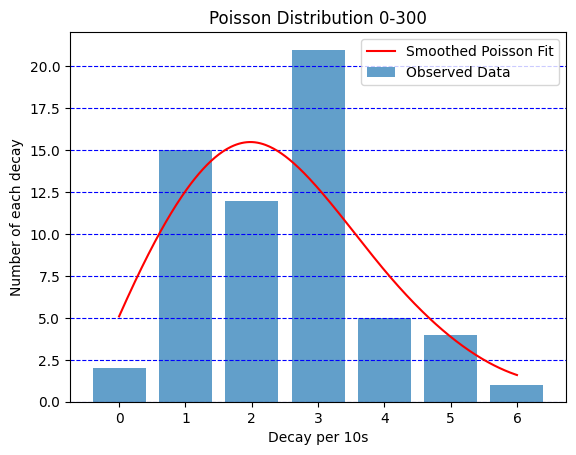

In [11]:
# Given data
mydict2 = {0: 2, 1: 15, 2: 12, 3: 21, 4: 5, 5: 4, 6: 1}\
#mydict2 = {0: 0, 1: 6, 2: 4, 3: 12, 4: 4, 5: 2, 6: 1}

# Calculate the mean (λ)
total_count = sum(mydict2.values())
mean_lambda = sum(k * count for k, count in mydict2.items()) / total_count

# Create bins for the histogram
bins = np.arange(-0.5, 7.5, 1)

# Compute the expected frequencies using the Poisson PMF
expected_freq = [poisson.pmf(k, mean_lambda) * total_count for k in range(7)]

# Smooth curve using spline interpolation
x_smooth = np.linspace(0, 6, 300)
spline = make_interp_spline(range(7), expected_freq)
y_smooth = spline(x_smooth)

# Plot the histogram and the curved Poisson distribution
plt.bar(mydict2.keys(), mydict2.values(), label="Observed Data", alpha=0.7)
plt.plot(x_smooth, y_smooth, color="red", label="Smoothed Poisson Fit")
plt.xlabel("Decay per 10s")
plt.ylabel("Number of each decay")
plt.title("Poisson Distribution 0-300")
plt.grid(axis='y',linestyle = '--',c = 'blue')
plt.legend()
#plt.show()
plt.savefig("0-600.png",bbox_inches='tight')


LinregressResult(slope=1722.0278582866385, intercept=0.701592431235186, rvalue=0.9995559443523968, pvalue=2.188303489641105e-10, stderr=20.957666265276032, intercept_stderr=0.3424749217399205)
LinregressResult(slope=703071.3330765751, intercept=-24.210110387620446, rvalue=0.9962941241781696, pvalue=5.470418832240913e-12, stderr=19194.177958000975, intercept_stderr=5.358624919791711)


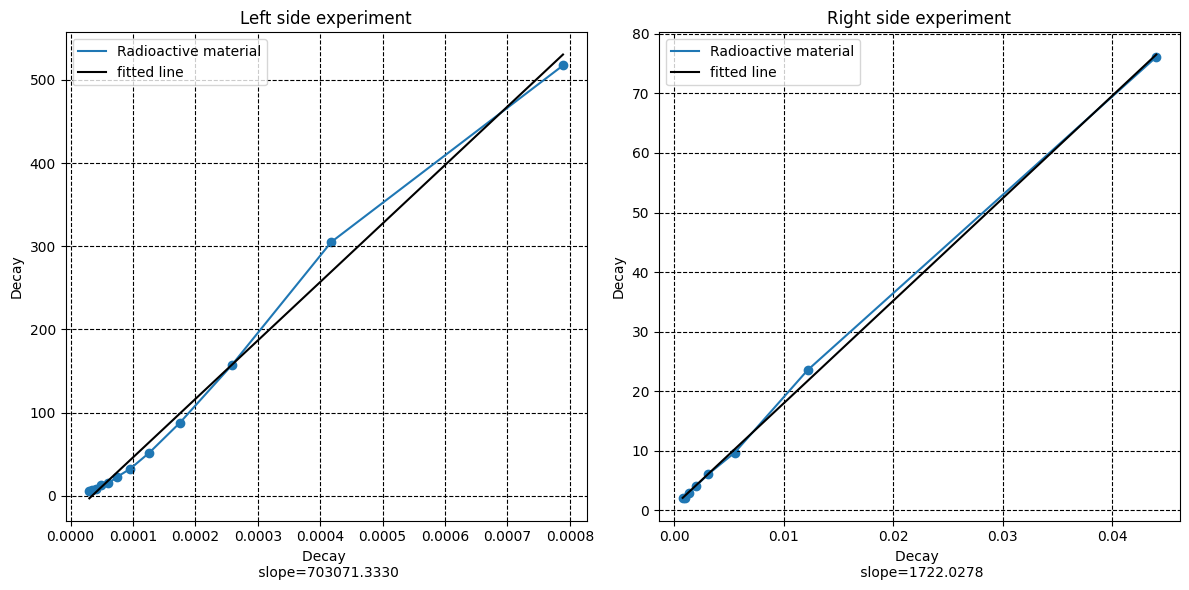

In [16]:
decay1 = {0: 9701, 63: 878, 64: 973, 96: 933, 191: 742, 362: 643, 556: 520, 745: 411, 919: 350}
decay2 = {0:9707,69:3262,101:1744,117:1336,190:787,253:778,336:722,433:673,556:710,715:691,860:669,1267:668,1705:625}

decay4 = {1:4568/60,2:1411/60,3:579/60,4:364/60,5:244/60,6:172/60,7:126/60,8:119/60}
decay3 = {8:15525/30,11:9156/30,14:4706/30,17:2632/30,20:1561/30,23:975/30,26:685/30,29:445/30,32:376/30,35:250/30,38:211/30,41:181/30}

list1 = list(decay3.keys())
decay5 = {}
i = 0
for d in list1:
    a = (1 - (d/sqrt(d**2 + 0.45**2)))/2
    decay5[a] = list(decay3.values())[i]
    i += 1
    
list1 = list(decay4.keys())
decay6 = {}
i = 0
for d in list1:
    a = (1 - (d/sqrt(d**2 + 0.45**2)))/2
    decay6[a] = list(decay4.values())[i]
    i += 1

x1 = list(decay6.keys())
x2 = list(decay5.keys())
y1 = list(decay6.values())
y2 = list(decay5.values())

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
res = linregress(np.array(x1), np.array(y1))
print(res)

axes[1].plot(x1, y1, label="Radioactive material")
axes[1].set_title("Right side experiment")
axes[1].set_xlabel("Decay \n slope=1722.0278")
axes[1].set_ylabel("Decay")
axes[1].plot(np.array(x1), res.intercept + res.slope*np.array(x1), 'black', label='fitted line')
axes[1].legend()

axes[0].plot(x2, y2, label="Radioactive material")
axes[0].set_title("Left side experiment")
axes[0].set_xlabel("Decay \n slope=703071.3330")
axes[0].set_ylabel("Decay")
res = linregress(np.array(x2), np.array(y2))
print(res)
axes[0].plot(np.array(x2), res.intercept + res.slope*np.array(x2), 'black', label='fitted line')

axes[0].grid(linestyle='--', c='black')
axes[1].grid(linestyle='--', c='black')
axes[1].scatter(x1,y1)
axes[0].scatter(x2,y2)
axes[0].legend()


#axes[0].set_yscale('log')
#axes[1].set_yscale('log')

plt.tight_layout()
#plt.show()
plt.savefig('random bullshit.png')

[5.82372676e+04 2.64621199e+01 2.53133356e+00]


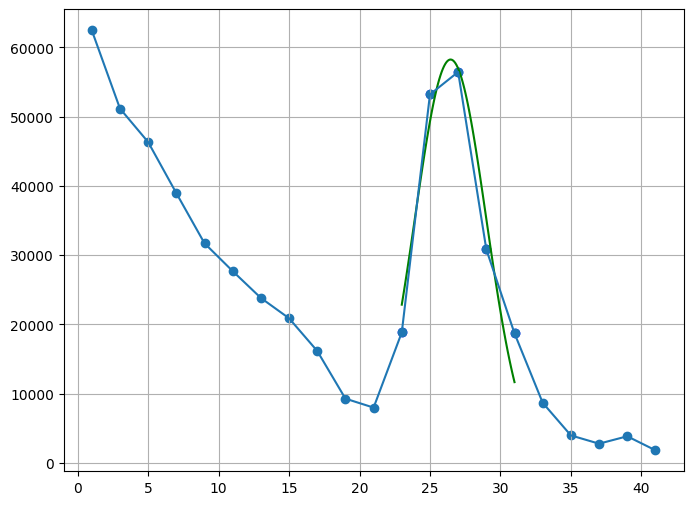

In [16]:
mydict = {1:62456,3:51163,5:46322,7:38953,9:31714,11:27696,13:23826,15:20891,17:16177,19:9297,21:8001,23:18849,25:53196,27:56443,29:30831,
          31:18717,33:8697,35:3991,37:2794,39:3864,41:1843}
x = mydict.keys()
y = mydict.values()

mydict2 = { 23: 18849, 25: 53196, 27: 56443, 29: 30831, 31: 18717}

x_values = np.array(list(mydict2.keys()))
y_values = np.array(list(mydict2.values()))

def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

initial_guess = [1.0, 27.0, 10000.0]
coeff, _ = curve_fit(gauss, x_values, y_values, p0=initial_guess)
print(coeff)
x_range = np.linspace(min(x_values), max(x_values), 100)
fitted_curve = gauss(x_range, *coeff)
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, label="Data points", color="blue")
plt.plot(x_range, fitted_curve, label="Fitted Gaussian", color="green")

plt.scatter(x,y)
plt.plot(x,y)
plt.grid()
plt.savefig('alll.png')

{180: '', 210: '843', 240: '975', 270: '1126', 300: '1234', 330: '1346', 360: '1468', 390: '1588', 420: '1712', 450: '1817', 480: '1922', 510: '2031', 540: '2159', 570: '2274', 600: '2380', 630: '2494', 660: '2613', 690: '2721', 720: '2815', 750: '2901', 780: '3009', 810: '3126', 840: '3228', 870: '3319', 900: '3419', 930: '3523', 960: '3631', 990: '3726', 1020: '3833', 1050: '3942', 1080: '4049', 1110: '4146', 1140: '4215', 1170: '4320', 1200: '4419', 1230: '4514', 1260: '4627', 1290: '4736', 1320: '4853', 1350: '4941', 1380: '5052', 1410: '5165', 1440: '5249', 1470: '5333', 1500: '5443', 1530: '5548', 1560: '5646', 1590: '5735', 1620: '5844', 1650: '5946', 1680: '6038', 1710: '6130', 1740: '6212', 1770: '6301', 1800: '6376', 1830: '6457', 1860: '6532', 1890: '6618', 1920: '6713', 1950: '6798', 1980: '6893', 2010: '6988', 2040: '7057', 2070: '7146', 2100: '7241', 2130: '7342', 2160: '7423', 2190: '7503', 2220: '7586', 2250: '7683', 2280: '7764', 2310: '7859', 2340: '7934', 2370: '8029', 2400: '8110', 2430: '8188', 2460: '8295', 2490: '8375', 2520: '8455', 2550: '8516', 2580: '8595', 2610: '8675', 2640: '8746', 2670: '8809', 2700: '8891', 2730: '8958', 2760: '9043', 2790: '9017', 2820: '9202', 2850: '9260', 2880: '9345', 2910: '9424', 2940: '9492', 2970: '9560', 3000: '9628', 3030: '9710', 3060: '9778', 3090: '9855', 3120: '9934', 3150: '10004', 3180: '10059', 3210: '10110', 3240: '10194', 3270: '10270', 3300: '10336', 3330: '10410', 3360: '10484', 3390: '10554', 3420: '10593', 3450: '10645', 3480: '10708', 3510: '10764', 3540: '10834', 3570: '10890', 3600: '10948', 3630: '11011', 3660: '11079', 3690: '11158', 3720: '11236', 3750: '11298', 3780: '11351', 3810: '11415', 3840: '11474', 3870: '11532', 3900: '11592', 3930: '11643', 3960: '11705', 3990: '11761', 4020: '11807', 4050: '11884', 4080: '11938', 4110: '11993', 4140: '12054', 4170: '12109', 4200: '12159', 4230: '12210', 4260: '12259', 4290: '12319', 4320: '12381', 4350: '12419', 4380: '12477', 4410: '12536', 4440: '12587', 4470: '12640', 4500: '12710', 4530: '12767', 4560: '12829', 4590: '12889', 4620: '12934', 4650: '12985', 4680: '13032'}


In [3]:
min1 = {0:0,3:16,6:37,9:49,12:70,15:90,18:100,21:105,24:126,27:138,30:151,33:162,36:170,39:184,42:194,45:210,48:226,51:238,54:257,57:262,60:277}
min2 = {66:301,72:322,78:353,84:374,90:387,96:410,102:424,108:446,114:468,120:494}
min3 = {130:533,140:578,150:612,160:648,170:681,180:732}

#min4 = {}
#for i in range(210,5000,30):
#    a = input('give me te decay:')
#    min4[i] = a
#print(min4)

min4 = {210: '843', 240: '975', 270: '1126', 300: '1234', 330: '1346', 360: '1468', 390: '1588', 420: '1712', 450: '1817', 480: '1922', 510: '2031', 540: '2159', 570: '2274', 600: '2380', 630: '2494', 660: '2613', 690: '2721', 720: '2815', 750: '2901', 780: '3009', 810: '3126', 840: '3228', 870: '3319', 900: '3419', 930: '3523', 960: '3631', 990: '3726', 1020: '3833', 1050: '3942', 1080: '4049', 1110: '4146', 1140: '4215', 1170: '4320', 1200: '4419', 1230: '4514', 1260: '4627', 1290: '4736', 1320: '4853', 1350: '4941', 1380: '5052', 1410: '5165', 1440: '5249', 1470: '5333', 1500: '5443', 1530: '5548', 1560: '5646', 1590: '5735', 1620: '5844', 1650: '5946', 1680: '6038', 1710: '6130', 1740: '6212', 1770: '6301', 1800: '6376', 1830: '6457', 1860: '6532', 1890: '6618', 1920: '6713', 1950: '6798', 1980: '6893', 2010: '6988', 2040: '7057', 2070: '7146', 2100: '7241', 2130: '7342', 2160: '7423', 2190: '7503', 2220: '7586', 2250: '7683', 2280: '7764', 2310: '7859', 2340: '7934', 2370: '8029', 2400: '8110', 2430: '8188', 2460: '8295', 2490: '8375', 2520: '8455', 2550: '8516', 2580: '8595', 2610: '8675', 2640: '8746', 2670: '8809', 2700: '8891', 2730: '8958', 2760: '9043', 2790: '9017', 2820: '9202', 2850: '9260', 2880: '9345', 2910: '9424', 2940: '9492', 2970: '9560', 3000: '9628', 3030: '9710', 3060: '9778', 3090: '9855', 3120: '9934', 3150: '10004', 3180: '10059', 3210: '10110', 3240: '10194', 3270: '10270', 3300: '10336', 3330: '10410', 3360: '10484', 3390: '10554', 3420: '10593', 3450: '10645', 3480: '10708', 3510: '10764', 3540: '10834', 3570: '10890', 3600: '10948', 3630: '11011', 3660: '11079', 3690: '11158', 3720: '11236', 3750: '11298', 3780: '11351', 3810: '11415', 3840: '11474', 3870: '11532', 3900: '11592', 3930: '11643', 3960: '11705', 3990: '11761', 4020: '11807', 4050: '11884', 4080: '11938', 4110: '11993', 4140: '12054', 4170: '12109', 4200: '12159', 4230: '12210', 4260: '12259', 4290: '12319', 4320: '12381', 4350: '12419', 4380: '12477', 4410: '12536', 4440: '12587', 4470: '12640', 4500: '12710', 4530: '12767', 4560: '12829', 4590: '12889', 4620: '12934', 4650: '12985', 4680: '13032'}

{180: '', 210: '843', 240: '975', 270: '1126', 300: '1234', 330: '1346', 360: '1468', 390: '1588', 420: '1712', 450: '1817', 480: '1922', 510: '2031', 540: '2159', 570: '2274', 600: '2380', 630: '2494', 660: '2613', 690: '2721', 720: '2815', 750: '2901', 780: '3009', 810: '3126', 840: '3228', 870: '3319', 900: '3419', 930: '3523', 960: '3631', 990: '3726', 1020: '3833', 1050: '3942', 1080: '4049', 1110: '4146', 1140: '4215', 1170: '4320', 1200: '4419', 1230: '4514', 1260: '4627', 1290: '4736', 1320: '4853', 1350: '4941', 1380: '5052', 1410: '5165', 1440: '5249', 1470: '5333', 1500: '5443', 1530: '5548', 1560: '5646', 1590: '5735', 1620: '5844', 1650: '5946', 1680: '6038', 1710: '6130', 1740: '6212', 1770: '6301', 1800: '6376', 1830: '6457', 1860: '6532', 1890: '6618', 1920: '6713', 1950: '6798', 1980: '6893', 2010: '6988', 2040: '7057', 2070: '7146', 2100: '7241', 2130: '7342', 2160: '7423', 2190: '7503', 2220: '7586', 2250: '7683', 2280: '7764', 2310: '7859', 2340: '7934', 2370: '8029

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[2.25625620e+04 1.84604917e-04 6.06148900e+00]


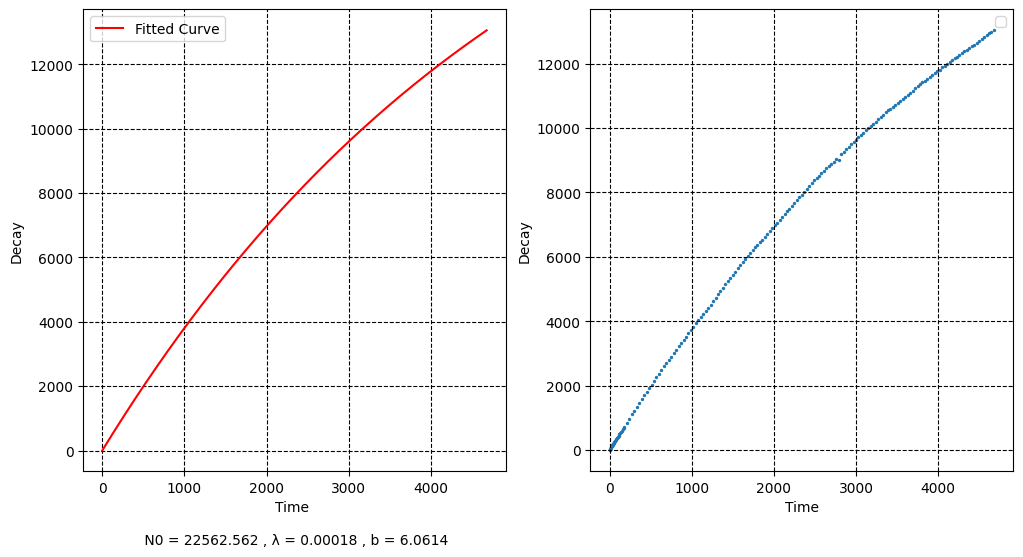

In [1]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

mydict = {0:0,3:16,6:37,9:49,12:70,15:90,18:100,21:105,24:126,27:138,30:151,33:162,36:170,39:184,42:194,45:210,48:226,51:238,54:257,57:262,60:277,66:301,72:322,78:353,84:374,90:387,96:410,102:424,108:446,114:468,120:494,130:533,140:578,150:612,160:648,170:681,180:732,210: '843', 240: '975', 270: '1126', 300: '1234', 330: '1346', 360: '1468', 390: '1588', 420: '1712', 450: '1817', 480: '1922', 510: '2031', 540: '2159', 570: '2274', 600: '2380', 630: '2494', 660: '2613', 690: '2721', 720: '2815', 750: '2901', 780: '3009', 810: '3126', 840: '3228', 870: '3319', 900: '3419', 930: '3523', 960: '3631', 990: '3726', 1020: '3833', 1050: '3942', 1080: '4049', 1110: '4146', 1140: '4215', 1170: '4320', 1200: '4419', 1230: '4514', 1260: '4627', 1290: '4736', 1320: '4853', 1350: '4941', 1380: '5052', 1410: '5165', 1440: '5249', 1470: '5333', 1500: '5443', 1530: '5548', 1560: '5646', 1590: '5735', 1620: '5844', 1650: '5946', 1680: '6038', 1710: '6130', 1740: '6212', 1770: '6301', 1800: '6376', 1830: '6457', 1860: '6532', 1890: '6618', 1920: '6713', 1950: '6798', 1980: '6893', 2010: '6988', 2040: '7057', 2070: '7146', 2100: '7241', 2130: '7342', 2160: '7423', 2190: '7503', 2220: '7586', 2250: '7683', 2280: '7764', 2310: '7859', 2340: '7934', 2370: '8029', 2400: '8110', 2430: '8188', 2460: '8295', 2490: '8375', 2520: '8455', 2550: '8516', 2580: '8595', 2610: '8675', 2640: '8746', 2670: '8809', 2700: '8891', 2730: '8958', 2760: '9043', 2790: '9017', 2820: '9202', 2850: '9260', 2880: '9345', 2910: '9424', 2940: '9492', 2970: '9560', 3000: '9628', 3030: '9710', 3060: '9778', 3090: '9855', 3120: '9934', 3150: '10004', 3180: '10059', 3210: '10110', 3240: '10194', 3270: '10270', 3300: '10336', 3330: '10410', 3360: '10484', 3390: '10554', 3420: '10593', 3450: '10645', 3480: '10708', 3510: '10764', 3540: '10834', 3570: '10890', 3600: '10948', 3630: '11011', 3660: '11079', 3690: '11158', 3720: '11236', 3750: '11298', 3780: '11351', 3810: '11415', 3840: '11474', 3870: '11532', 3900: '11592', 3930: '11643', 3960: '11705', 3990: '11761', 4020: '11807', 4050: '11884', 4080: '11938', 4110: '11993', 4140: '12054', 4170: '12109', 4200: '12159', 4230: '12210', 4260: '12259', 4290: '12319', 4320: '12381', 4350: '12419', 4380: '12477', 4410: '12536', 4440: '12587', 4470: '12640', 4500: '12710', 4530: '12767', 4560: '12829', 4590: '12889', 4620: '12934', 4650: '12985', 4680: '13032'}

x1 = mydict.keys()
y1 = mydict.values()
x = np.array(list(mydict.keys()))
y = np.array(list(mydict.values()))

def func(x, A, p, b):
    return A * (1 - np.exp(-p*x)) + b

initial_guess = [1, 1e-6, 1]

popt, pcov = curve_fit(func, x, y, p0=initial_guess)
A, p, b = popt
print(popt)

xx = np.linspace(min(x), max(x), 1000)
yy = func(xx, A, p, b)

axes[0].plot(xx, yy, label='Fitted Curve', color='red')
axes[1].scatter(x1,y1,s=2)
axes[0].grid(linestyle = '--', c = 'black')
axes[1].grid(linestyle = '--' , c = 'black')
axes[0].legend()
axes[1].legend()
axes[0].set_ylabel('Decay')
axes[1].set_ylabel('Decay')
axes[0].set_xlabel('Time \n\n N0 = 22562.562 , λ = 0.00018 , b = 6.0614')
axes[1].set_xlabel('Time')
plt.show()
#plt.savefig('second ordinary.png')

In [1]:
mydict = {}
for i in range(0,300,2):
    a = int(input())
    mydict[i] = a 
print(mydict)

{0: 0, 2: 23, 4: 59, 6: 79, 8: 114, 10: 139, 12: 169, 14: 204, 16: 233, 18: 259, 20: 291, 22: 313, 24: 327, 26: 349, 28: 380, 30: 403, 32: 421, 34: 434, 36: 450, 38: 469, 40: 485, 42: 501, 44: 524, 46: 543, 48: 547, 50: 563, 52: 579, 54: 585, 56: 593, 58: 605, 60: 614, 62: 624, 64: 633, 66: 645, 68: 654, 70: 663, 72: 673, 74: 694, 76: 701, 78: 713, 80: 719, 82: 723, 84: 735, 86: 741, 88: 749, 90: 753, 92: 759, 94: 764, 96: 765, 98: 771, 100: 780, 102: 789, 104: 795, 106: 804, 108: 813, 110: 823, 112: 825, 114: 831, 116: 833, 118: 834, 120: 839, 122: 845, 124: 851, 126: 859, 128: 865, 130: 869, 132: 871, 134: 875, 136: 884, 138: 885, 140: 889, 142: 890, 144: 898, 146: 905, 148: 905, 150: 912, 152: 911, 154: 917, 156: 921, 158: 921, 160: 931, 162: 935, 164: 937, 166: 943, 168: 945, 170: 949, 172: 954, 174: 960, 176: 963, 178: 965, 180: 969, 182: 971, 184: 975, 186: 983, 188: 989, 190: 989, 192: 993, 194: 997, 196: 999, 198: 1001, 200: 1003, 202: 1003, 204: 1004, 206: 1007, 208: 1013, 210

[1.01334372e+03 6.89191859e+02 1.30922320e-03 2.29019086e-02]
534.6681899469894
30.565138109096736


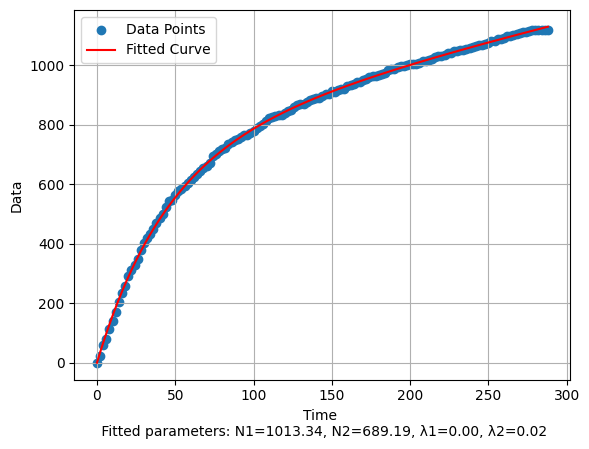

In [62]:
mydict = {0: 0, 2: 23, 4: 59, 6: 79, 8: 114, 10: 139, 12: 169, 14: 204, 16: 233, 18: 259, 20: 291, 22: 313, 24: 327, 26: 349, 28: 380, 30: 403, 32: 421, 34: 434, 36: 450, 38: 469, 40: 485, 42: 501, 44: 524, 46: 543, 48: 547, 50: 563, 52: 579, 54: 585, 56: 593, 58: 605, 60: 614, 62: 624, 64: 633, 66: 645, 68: 654, 70: 663, 72: 673, 74: 694, 76: 701, 78: 713, 80: 719, 82: 723, 84: 735, 86: 741, 88: 749, 90: 753, 92: 759, 94: 764, 96: 765, 98: 771, 100: 780, 102: 789, 104: 795, 106: 804, 108: 813, 110: 823, 112: 825, 114: 831, 116: 833, 118: 834, 120: 839, 122: 845, 124: 851, 126: 859, 128: 865, 130: 869, 132: 871, 134: 875, 136: 884, 138: 885, 140: 889, 142: 890, 144: 898, 146: 905, 148: 905, 150: 912, 152: 911, 154: 917, 156: 921, 158: 921, 160: 931, 162: 935, 164: 937, 166: 943, 168: 945, 170: 949, 172: 954, 174: 960, 176: 963, 178: 965, 180: 969, 182: 971, 184: 975, 186: 983, 188: 989, 190: 989, 192: 993, 194: 997, 196: 999, 198: 1001, 200: 1003, 202: 1003, 204: 1004, 206: 1007, 208: 1013, 210: 1015, 212: 1017, 214: 1021, 216: 1029, 218: 1030, 220: 1031, 222: 1035, 224: 1041, 226: 1043, 228: 1049, 230: 1049, 232: 1051, 234: 1053, 236: 1055, 238: 1057, 240: 1061, 242: 1065, 244: 1067, 246: 1069, 248: 1070, 250: 1074, 252: 1080, 254: 1083, 256: 1087, 258: 1089, 260: 1093, 262: 1097, 264: 1099, 266: 1103, 268: 1105, 270: 1109, 272: 1112, 274: 1113, 276: 1115, 278: 1117, 280: 1118, 282: 1119, 284: 1120, 286: 1120, 288: 1120}

# Define the function you want to fit
def func(t, N1, N2, l1, l2):
    return (N1 * (1 - np.exp(-l1 * t))) + (N2 * (1 - np.exp(-l2 * t))) + (0.4275 * t)

# Get time values and data points
time_values = np.array(list(mydict.keys()))
data_points = np.array(list(mydict.values()))

# Fit the curve
params, covariance = curve_fit(func, time_values, data_points)
clear_output()
print(params)
N1_fit, N2_fit, l1_fit, l2_fit = params
a1 = (1/l1_fit) * 0.7
a2 = (1/l2_fit) * 0.7
print(a1)
print(a2)
t_fit = np.linspace(min(time_values), max(time_values), 1000)
curve_fit_values = func(t_fit, N1_fit, N2_fit, l1_fit, l2_fit)

plt.scatter(time_values, data_points, label='Data Points')
plt.plot(t_fit, curve_fit_values, label='Fitted Curve', color='red')
plt.xlabel(f'Time \n Fitted parameters: N1={N1_fit:.2f}, N2={N2_fit:.2f}, λ1={l1_fit:.2f}, λ2={l2_fit:.2f}')
plt.ylabel('Data')
plt.legend()
plt.grid()
plt.savefig('the_last_experiment.png')

[ 689.18369776 1003.45753074   43.66452329  759.60735887]
0.01603132124621756
0.0009215287237877269


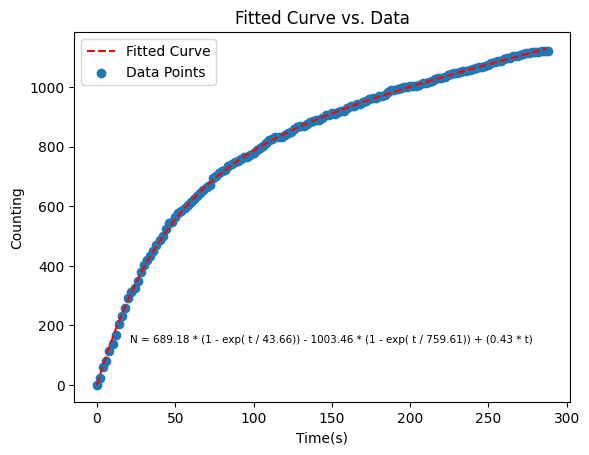

y = 689.18 * (1 - np.exp(-x / 43.66)) - 1003.46 * (1 - np.exp(-x / 759.61)) + (0.43 * x)


In [68]:
df = pd.DataFrame({'x': list(mydict.keys()) ,'y': list(mydict.values())})
r = 520 / 1200
def objective(x, N1, N2, i, L):
    return N1 * (1 - np.exp(-x / i)) + N2 * (1 - np.exp(-x / L)) + (r * x)

popt, _ = curve_fit(objective, df['x'], df['y'])
print(popt)
N1, N2, i, L = popt
a1 = (1/i) * 0.7
a2 = (1/L) * 0.7
print(a1)
print(a2)
x_line = np.arange(min(df['x']), max(df['x']), 1)
y_line = objective(x_line, N1, N2, i, L)
plt.plot(x_line, y_line, '--', color='red', label='Fitted Curve')
plt.scatter(df['x'], df['y'], label='Data Points')
plt.xlabel('Time(s)')
plt.ylabel('Counting')
plt.title('Fitted Curve vs. Data')
plt.legend()
plt.text(21, 140, f'N = {N1:.2f} * (1 - exp( t / {i:.2f})) - {N2:.2f} * (1 - exp( t / {L:.2f})) + ({r:.2f} * t)', fontsize=7.5, color='black')
plt.show()
print(f"y = {N1:.2f} * (1 - np.exp(-x / {i:.2f})) - {N2:.2f} * (1 - np.exp(-x / {L:.2f})) + ({geiger muller counterr:.2f} * x)")

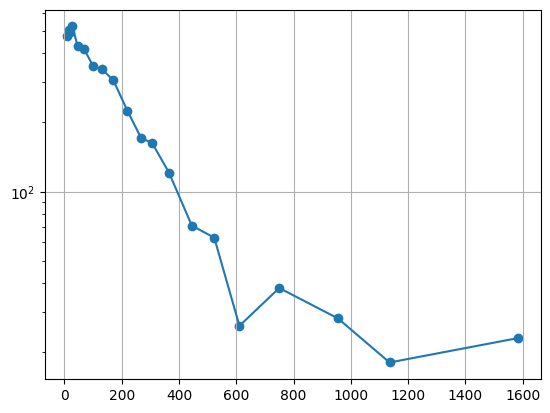

In [84]:
mydict = {10.1:478,14.5:507,20.9:495,28.2:524,45.8:432,68.7:418,101:351,132:341,
          171:305,220:225,268:171,306:163,365:121,445:71,523:63,611:26,750:38,955:28,
          1135:18,1584:23}

x = mydict.keys()
y = mydict.values()

plt.plot(x,y)
plt.scatter(x,y)
plt.yscale('log')
plt.grid()
plt.ylable()
plt.xlabel
plt.show()